<a href="https://colab.research.google.com/github/SudharsanSrinivasan14/POC/blob/main/Random_Forest_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Data On Boarding**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving 01Exercise1.csv to 01Exercise1.csv


In [3]:
df = pd.read_csv('01Exercise1.csv')

In [4]:
df

,gender,married,ch,income,loanamt,status
0,Male,No,1.0,5849,NaN,Y
1,Male,Yes,1.0,4583,128.0,N
2,Male,Yes,1.0,3000,66.0,Y
3,Male,Yes,1.0,2583,120.0,Y
4,Male,No,1.0,6000,141.0,Y
...,...,...,...,...,...,...
609,Female,No,1.0,2900,71.0,Y
610,Male,Yes,1.0,4106,40.0,Y
611,Male,Yes,1.0,8072,253.0,Y
612,Male,Yes,1.0,7583,187.0,Y


In [5]:
dt=df.copy()

# **EDA**

In [6]:
df.shape

(614, 6)

In [7]:
df.columns

Index(['gender', 'married', 'ch', 'income', 'loanamt', 'status'], dtype='object')

In [8]:
df.head()

,gender,married,ch,income,loanamt,status
0,Male,No,1.0,5849,NaN,Y
1,Male,Yes,1.0,4583,128.0,N
2,Male,Yes,1.0,3000,66.0,Y
3,Male,Yes,1.0,2583,120.0,Y
4,Male,No,1.0,6000,141.0,Y


In [9]:
df.describe()

,ch,income,loanamt
count,564.000000,614.000000,592.000000
mean,0.842199,5403.459283,146.412162
std,0.364878,6109.041673,85.587325
min,0.000000,150.000000,9.000000
25%,1.000000,2877.500000,100.000000
50%,1.000000,3812.500000,128.000000
75%,1.000000,5795.000000,168.000000
max,1.000000,81000.000000,700.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gender   601 non-null    object 
 1   married  611 non-null    object 
 2   ch       564 non-null    float64
 3   income   614 non-null    int64  
 4   loanamt  592 non-null    float64
 5   status   614 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 28.9+ KB


In [11]:
df.isnull()

,gender,married,ch,income,loanamt,status
0,False,False,False,False,True,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
609,False,False,False,False,False,False
610,False,False,False,False,False,False
611,False,False,False,False,False,False
612,False,False,False,False,False,False


In [12]:
df.isnull().sum()

gender     13
married     3
ch         50
income      0
loanamt    22
status      0
dtype: int64

# **Replacing NaN Values**

In [13]:
# Replace missing categorical values using column names
cols = ['gender', 'married','ch','loanamt']
# fillna for filling NaN values
df[cols] = df[cols].fillna(df.mode().iloc[0]) #categorical repeates , most frequent (mode)
df[cols]

,gender,married,ch,loanamt
0,Male,No,1.0,120.0
1,Male,Yes,1.0,128.0
2,Male,Yes,1.0,66.0
3,Male,Yes,1.0,120.0
4,Male,No,1.0,141.0
...,...,...,...,...
609,Female,No,1.0,71.0
610,Male,Yes,1.0,40.0
611,Male,Yes,1.0,253.0
612,Male,Yes,1.0,187.0


In [14]:
df.isnull().sum()

gender     0
married    0
ch         0
income     0
loanamt    0
status     0
dtype: int64

In [15]:
df

,gender,married,ch,income,loanamt,status
0,Male,No,1.0,5849,120.0,Y
1,Male,Yes,1.0,4583,128.0,N
2,Male,Yes,1.0,3000,66.0,Y
3,Male,Yes,1.0,2583,120.0,Y
4,Male,No,1.0,6000,141.0,Y
...,...,...,...,...,...,...
609,Female,No,1.0,2900,71.0,Y
610,Male,Yes,1.0,4106,40.0,Y
611,Male,Yes,1.0,8072,253.0,Y
612,Male,Yes,1.0,7583,187.0,Y


# **Label Encoding**

In [16]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['married'] = label_encoder.fit_transform(df['married'])
df['status'] = label_encoder.fit_transform(df['status'])
df

,gender,married,ch,income,loanamt,status
0,1,0,1.0,5849,120.0,1
1,1,1,1.0,4583,128.0,0
2,1,1,1.0,3000,66.0,1
3,1,1,1.0,2583,120.0,1
4,1,0,1.0,6000,141.0,1
...,...,...,...,...,...,...
609,0,0,1.0,2900,71.0,1
610,1,1,1.0,4106,40.0,1
611,1,1,1.0,8072,253.0,1
612,1,1,1.0,7583,187.0,1


# **X,Y ILOC**

In [17]:
x=df.iloc[:,0:5]
x

,gender,married,ch,income,loanamt
0,1,0,1.0,5849,120.0
1,1,1,1.0,4583,128.0
2,1,1,1.0,3000,66.0
3,1,1,1.0,2583,120.0
4,1,0,1.0,6000,141.0
...,...,...,...,...,...
609,0,0,1.0,2900,71.0
610,1,1,1.0,4106,40.0
611,1,1,1.0,8072,253.0
612,1,1,1.0,7583,187.0


In [18]:
y=df.iloc[:,5]
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: status, Length: 614, dtype: int64

# **train_test_split**

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.30, random_state=0)

In [20]:
y_test

454    1
52     0
536    1
469    0
55     1
      ..
242    1
515    1
582    1
225    0
134    1
Name: status, Length: 185, dtype: int64

# **Random Forest Classifier**

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [25]:
classifier = RandomForestClassifier(n_estimators=10)    # n_estimators means no. of decision tress in Random forest

In [37]:
classifier = classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test).astype(int)

In [24]:
print (y_pred)

[0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0
 1 1 1 1 0 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1
 1 1 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1
 0 1 1 0 0 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1 1
 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1]


In [35]:
print ('Accuracy : ', metrics.accuracy_score(y_test,y_pred))

Accuracy :  0.7621621621621621


In [39]:
score = classifier.score(x_test, y_test)
score

0.7783783783783784

## **Tree Plots**

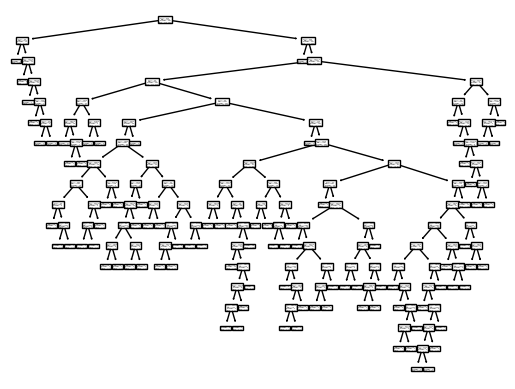

In [42]:
from sklearn import tree
fig = plt.figure()
tree.plot_tree(classifier.estimators_[5])         # estimators_[5] means shows the 6th decision Tree. That Means (0,1,2,3,4,5)

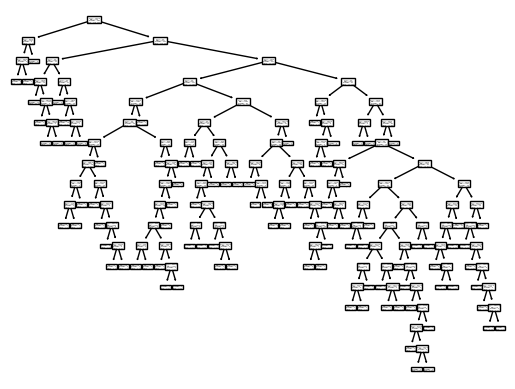

In [43]:
tree.plot_tree(classifier.estimators_[9])    # estimators_[9] means shows the 10th decision Tree. That Means (0,1,2,3,4,5,6,7,8,9)
plt.show()